<a href="https://colab.research.google.com/github/sunshine01910/eco.cva/blob/main/Taller_2_2022_10_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Integrantes: Maria Estefania Silva Leal, Juliette Alexandra Garavito Tique y Sara Lucia Pulido Reina

# Taller: efecto de una arteria sobre los precios de la vivienda 

El siguiente taller es opcional. Usted puede decidir hacerlo o no, no tendrá efecto en su nota si no lo hace, pero si decide hacerlo y lo entrega, tendrá un valor del 7% sobre la nota del parcial final.

El dataset a analizar y con el cual se va a modelar contiene las siguientes variables:

`LotArea`: area del inmueble

`OverallQual`: calidad general del inmueble

`OverallCond`: condición general del inmueble

`YearBuilt`: año de construcción

`YearRemodAdd`: año de remodelación

`ExterQual`: calidad de la fachada

`ExterCond`: condición de la fachada

`BedroomAbvGr`: habitaciones

`GarageCars`: número de garajes

`PoolArea`: área de la piscina

`SalePrice`: precio de venta

`Artery`: tiene o no una árteria cerca

El objetivo es responder a la pregunta ¿cuál es el efecto de una arteria sobre el precio de la vivienda?

## Importación de librerías y datos

In [ ]:
# importe las librerías que considere necesarias para manipular datos

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as st
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
# importe la base de datos que acompaña este notebook

In [ ]:
df = pd.read_csv('datos.csv')

## Exploración inicial

In [ ]:
# observe los primeros 10 datos de la tabla y concluya

In [ ]:
df.head(10)

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BedroomAbvGr,GarageCars,PoolArea,SalePrice,Artery
0,8450,7,5,19,19,4,3,3,2,0,208500,0
1,9600,6,8,46,46,3,3,3,2,0,181500,0
2,11250,7,5,21,20,4,3,3,2,0,223500,0
3,9550,7,5,107,52,3,3,3,3,0,140000,0
4,14260,8,5,22,22,4,3,4,3,0,250000,0
5,14115,5,5,29,27,3,3,1,2,0,143000,0
6,10084,8,5,18,17,4,3,3,2,0,307000,0
7,10382,7,6,49,49,3,3,3,2,0,200000,0
8,6120,7,5,91,72,3,3,2,2,0,129900,1
9,7420,5,6,83,72,3,3,2,1,0,118000,1


Se evidencian doce variables las cuales son datos discretos ya que presentan sus valores en enteros, por otro lado se observa que existe un dato cualitativo *Artery* que puede ser codificado como 0 = No y 1 = Si

In [ ]:
# observe los últimos 10 datos de la tabla y concluya

In [ ]:
df.tail(10)

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BedroomAbvGr,GarageCars,PoolArea,SalePrice,Artery
1450,9000,5,5,48,48,3,3,4,0,0,136000,0
1451,9262,8,5,14,13,4,3,3,3,0,287090,0
1452,3675,5,5,17,17,3,3,2,2,0,145000,0
1453,17217,5,5,16,16,3,3,3,0,0,84500,0
1454,7500,7,5,18,17,4,3,2,2,0,185000,0
1455,7917,6,5,23,22,3,3,3,2,0,175000,0
1456,13175,6,6,44,34,3,3,3,2,0,210000,0
1457,9042,7,9,81,16,5,4,4,1,0,266500,0
1458,9717,5,6,72,26,3,3,2,1,0,142125,0
1459,9937,5,6,57,57,4,3,3,1,0,147500,0


Se evidencian doce variables las cuales son datos discretos ya que presentan sus valores en enteros, por otro lado se observa que existe un dato cualitativo *Artery* que puede ser codificado como 0 = No y 1 = Si

In [ ]:
# obtenga información general de los datos (número de filas, columnas, datos faltantes, tipos de datos) y concluya

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotArea       1460 non-null   int64
 1   OverallQual   1460 non-null   int64
 2   OverallCond   1460 non-null   int64
 3   YearBuilt     1460 non-null   int64
 4   YearRemodAdd  1460 non-null   int64
 5   ExterQual     1460 non-null   int64
 6   ExterCond     1460 non-null   int64
 7   BedroomAbvGr  1460 non-null   int64
 8   GarageCars    1460 non-null   int64
 9   PoolArea      1460 non-null   int64
 10  SalePrice     1460 non-null   int64
 11  Artery        1460 non-null   int64
dtypes: int64(12)
memory usage: 137.0 KB


Se puede concluir y confirmar que existen 12 variables discretas, ninguna tiene datos faltantes. Hay 1460 datos.

In [ ]:
# obtenga una descripción general de los datos y concluya

In [ ]:
df.describe()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BedroomAbvGr,GarageCars,PoolArea,SalePrice,Artery
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,5.575342,50.732192,37.134247,3.39589,3.083562,2.866438,1.767123,2.758904,180921.195890,0.032877
std,9981.264932,1.382997,1.112799,30.202904,20.645407,0.57428,0.351054,0.815778,0.747315,40.177307,79442.502883,0.178375
min,1300.000000,1.000000,1.000000,12.000000,12.000000,2.00000,1.000000,0.000000,0.000000,0.000000,34900.000000,0.000000
25%,7553.500000,5.000000,5.000000,22.000000,18.000000,3.00000,3.000000,2.000000,1.000000,0.000000,129975.000000,0.000000
50%,9478.500000,6.000000,5.000000,49.000000,28.000000,3.00000,3.000000,3.000000,2.000000,0.000000,163000.000000,0.000000
75%,11601.500000,7.000000,6.000000,68.000000,55.000000,4.00000,3.000000,3.000000,2.000000,0.000000,214000.000000,0.000000
max,215245.000000,10.000000,9.000000,150.000000,72.000000,5.00000,5.000000,8.000000,4.000000,738.000000,755000.000000,1.000000


* Al observar la variable *Artery*, se evidencia que la media es un valor pequeño, lo que indica que en esta variable la mayoría de las respuestas fueron 0=No
* Dado que los datos estan acumulados hacia la izquierda, se asemeja a una distribución Pearson

### Verificación de duplicados

In [ ]:
# verifique si hay duplicados y elimínelos

In [ ]:
df.duplicated().sum()

0

### Verificación de datos nulos

In [ ]:
# verifique si hay datos nulos y elimínelos

In [ ]:
df.isna().sum()

LotArea         0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
ExterQual       0
ExterCond       0
BedroomAbvGr    0
GarageCars      0
PoolArea        0
SalePrice       0
Artery          0
dtype: int64

## Visualización de datos

### Visualización univariada

In [ ]:
# para datos continuos o discretos (si los hay) emplee histogramas y concluya para cada gráfico (uno por variable)

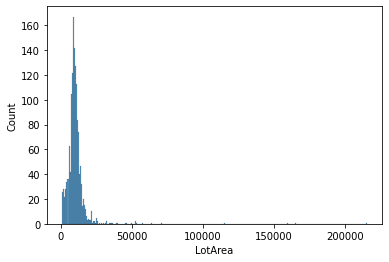

In [ ]:
sns.histplot(df['LotArea'])

Tiene una asimetría positiva ya que su valor esperado se encuentra a la izquierda, su forma es leptocúrtica.



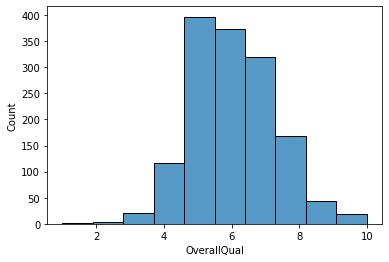

In [ ]:
sns.histplot(df['OverallQual'],bins=10)

Tiene una asimetría negativa ya que su media se encuentra a la derecha y su forma es leptocúrtica.

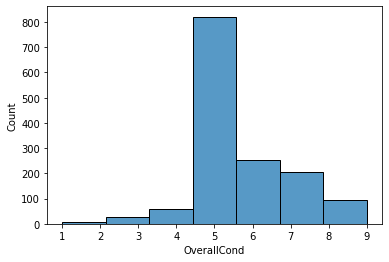

In [ ]:
sns.histplot(df['OverallCond'],bins=7)

Tiene una asimetría negativa ya que su media se encuentra a la derecha y su forma es leptocúrtica. El valor que se presenta con mayor frecuencia (moda) es 5.

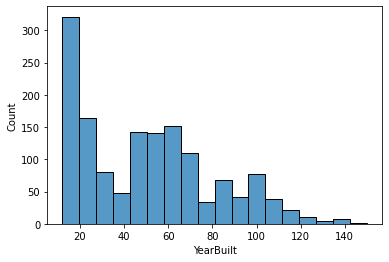

In [ ]:
sns.histplot(df['YearBuilt'])

Tiene una asimetría positiva con datos a la izquierda, se observan datos atípicos. 

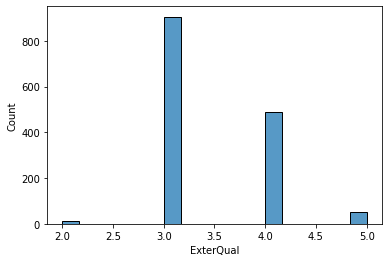

In [ ]:
sns.histplot(df['ExterQual'])

Esta variable puede ser categórica porque presenta datos enteros y tiene similitud con las escalas de medición usadas en encuestas.

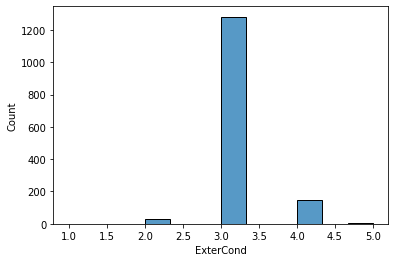

In [ ]:
sns.histplot(df['ExterCond'])

La condición de la fachada es significativa respecto al número de filas del DataFrame

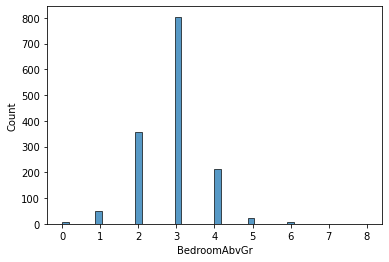

In [ ]:
sns.histplot(df['BedroomAbvGr'])

Gran parte de la población de la muestra respondió por 3 habitaciones.

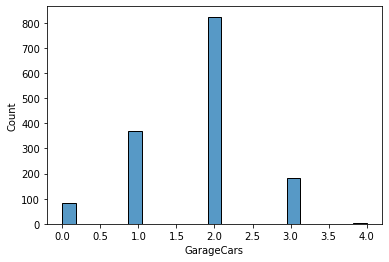

In [ ]:
sns.histplot(df['GarageCars'])

Gran parte de la población de la muestra respondió por 2 garajes.

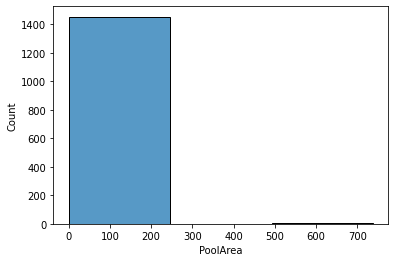

In [ ]:
sns.histplot(df['PoolArea'], bins=3)

La mayoría de la población de la muestra no tiene área de piscina.

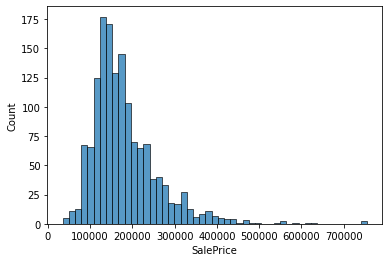

In [ ]:
sns.histplot(df['SalePrice'])

Tiene una asimetría positiva ya que su valor esperado se encuentra a la izquierda, su forma es leptocúrtica.

In [ ]:
# para datos categóricos (si los hay) emplee un diagrama de barras y concluya para cada gráfico (uno por variable)

In [ ]:
Artery = df['Artery'].value_counts()
Artery

0    1412
1      48
Name: Artery, dtype: int64

In [ ]:
Artery.index

Int64Index([0, 1], dtype='int64')

In [ ]:
Artery.values

array([1412,   48])

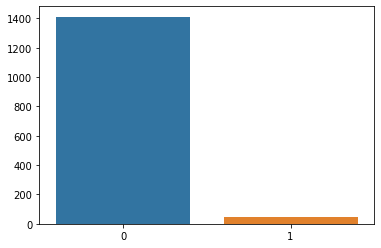

In [ ]:
sns.barplot(x=Artery.index, y=Artery.values)

De acuerdo con la gráfica, gran parte de la población evitaría estar cerca de la arteria.

### Visualización bivariada

In [ ]:
# para identificar relaciones entre la variable objetivo (precio) y variables continuas utilice diagramas de dispersión y concluya para cada gráfico (uno por relación)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


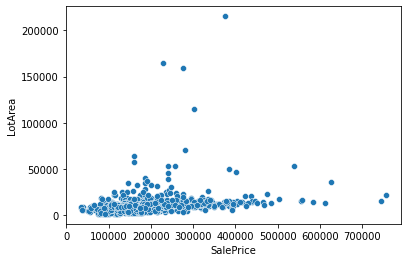

In [ ]:
sns.scatterplot(df['SalePrice'],df['LotArea'])

Cuando el área crece, el precio de venta crece.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


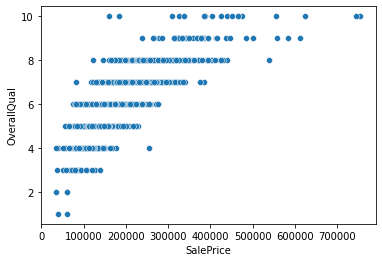

In [ ]:
sns.scatterplot(df['SalePrice'],df['OverallQual'])

El precio de venta aumenta ligeramente ha medida que la calidad general incrementa.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


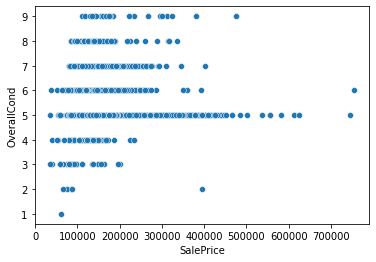

In [ ]:
sns.scatterplot(df['SalePrice'],df['OverallCond'])

El precio de venta aumenta ligeramente ha medida que la condición general incrementa.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


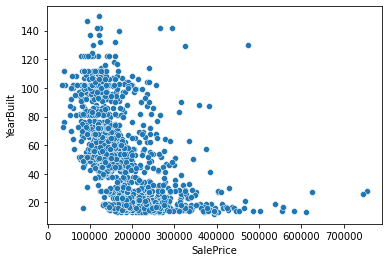

In [ ]:
sns.scatterplot(df['SalePrice'],df['YearBuilt'])

Hay una alta correlación positiva entre los años de construcción y el precio de venta de la vivienda.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


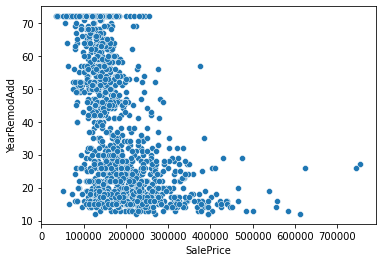

In [ ]:
sns.scatterplot(df['SalePrice'],df['YearRemodAdd'])

Hay una alta correlación positiva entre los años de remodelación y el precio de venta de la vivienda.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


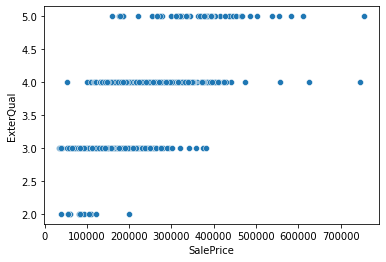

In [ ]:
sns.scatterplot(df['SalePrice'],df['ExterQual'])

El precio de venta aumenta ligeramente ha medida que la calidad de la fachada incrementa

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


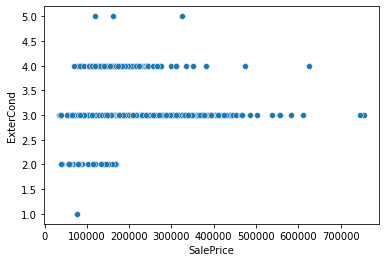

In [ ]:
sns.scatterplot(df['SalePrice'],df['ExterCond'])

El precio de venta aumenta ligeramente ha medida que la condición de la fachada incrementa.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


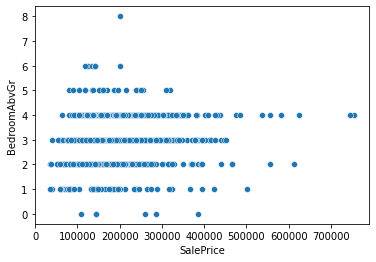

In [ ]:
sns.scatterplot(df['SalePrice'],df['BedroomAbvGr'])

El precio de venta aumenta ha medida que incrementa las habitaciones. Hay mayor agrupación de datos entre 1 y 4 habitaciones.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


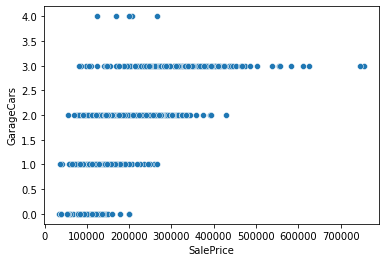

In [ ]:
sns.scatterplot(df['SalePrice'],df['GarageCars'])

El precio de venta aumenta ligeramente ha medida que hay más garajes.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


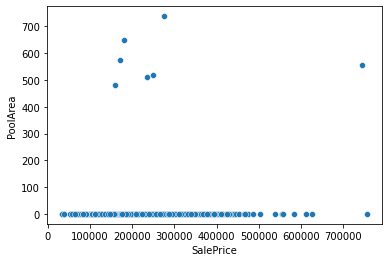

In [ ]:
sns.scatterplot(df['SalePrice'],df['PoolArea'])

De acuerdo con la gráfica, los datos se concentran más en una área 0 de piscina.

In [ ]:
# para identificar relaciones entre la variable objetivo (precio) y variables categóricas utilice boxplots y concluya para cada gráfico (uno por relación)

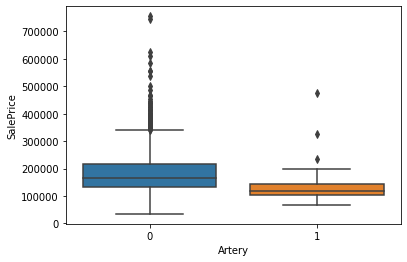

In [ ]:
sns.boxplot(data=df, x='Artery', y='SalePrice')

La distribución es asimétrica negativa ya que la parte superior a la mediana es mayor,po tal motivo la media es menor a la mediana, además se observa demasiados valores atípicos entre el precio de venta y la inexistencia de la arteria.

## Análisis de correlación

In [ ]:
# construya una matriz de correlación haciendo uso del método de pearson y concluya

In [ ]:
df.corr(method='pearson')

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BedroomAbvGr,GarageCars,PoolArea,SalePrice,Artery
LotArea,1.000000,0.105806,-0.005636,-0.014228,-0.013788,0.055570,0.014732,0.119690,0.154871,0.077672,0.263843,-0.009526
OverallQual,0.105806,1.000000,-0.091932,-0.572323,-0.550684,0.726278,0.013953,0.101676,0.600671,0.065166,0.790982,-0.068812
OverallCond,-0.005636,-0.091932,1.000000,0.375983,-0.073741,-0.138942,0.389163,0.012980,-0.185758,-0.001985,-0.077856,0.080743
YearBuilt,-0.014228,-0.572323,0.375983,1.000000,0.592855,-0.598160,0.103925,0.070651,-0.537850,-0.004950,-0.522897,0.233179
YearRemodAdd,-0.013788,-0.550684,-0.073741,0.592855,1.000000,-0.587318,-0.074745,0.040581,-0.420622,-0.005829,-0.507101,0.164073
ExterQual,0.055570,0.726278,-0.138942,-0.598160,-0.587318,1.000000,0.009184,-0.018729,0.526390,0.034766,0.682639,-0.100382
ExterCond,0.014732,0.013953,0.389163,0.103925,-0.074745,0.009184,1.000000,0.015065,-0.009377,0.044387,0.018899,0.076499
BedroomAbvGr,0.119690,0.101676,0.012980,0.070651,0.040581,-0.018729,0.015065,1.000000,0.086106,0.070703,0.168213,0.049038
GarageCars,0.154871,0.600671,-0.185758,-0.537850,-0.420622,0.526390,-0.009377,0.086106,1.000000,0.020934,0.640409,-0.071068
PoolArea,0.077672,0.065166,-0.001985,-0.004950,-0.005829,0.034766,0.044387,0.070703,0.020934,1.000000,0.092404,0.036302


In [ ]:
df.corr()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BedroomAbvGr,GarageCars,PoolArea,SalePrice,Artery
LotArea,1.000000,0.105806,-0.005636,-0.014228,-0.013788,0.055570,0.014732,0.119690,0.154871,0.077672,0.263843,-0.009526
OverallQual,0.105806,1.000000,-0.091932,-0.572323,-0.550684,0.726278,0.013953,0.101676,0.600671,0.065166,0.790982,-0.068812
OverallCond,-0.005636,-0.091932,1.000000,0.375983,-0.073741,-0.138942,0.389163,0.012980,-0.185758,-0.001985,-0.077856,0.080743
YearBuilt,-0.014228,-0.572323,0.375983,1.000000,0.592855,-0.598160,0.103925,0.070651,-0.537850,-0.004950,-0.522897,0.233179
YearRemodAdd,-0.013788,-0.550684,-0.073741,0.592855,1.000000,-0.587318,-0.074745,0.040581,-0.420622,-0.005829,-0.507101,0.164073
ExterQual,0.055570,0.726278,-0.138942,-0.598160,-0.587318,1.000000,0.009184,-0.018729,0.526390,0.034766,0.682639,-0.100382
ExterCond,0.014732,0.013953,0.389163,0.103925,-0.074745,0.009184,1.000000,0.015065,-0.009377,0.044387,0.018899,0.076499
BedroomAbvGr,0.119690,0.101676,0.012980,0.070651,0.040581,-0.018729,0.015065,1.000000,0.086106,0.070703,0.168213,0.049038
GarageCars,0.154871,0.600671,-0.185758,-0.537850,-0.420622,0.526390,-0.009377,0.086106,1.000000,0.020934,0.640409,-0.071068
PoolArea,0.077672,0.065166,-0.001985,-0.004950,-0.005829,0.034766,0.044387,0.070703,0.020934,1.000000,0.092404,0.036302


Es una matriz idéntica y transpuesta.

In [ ]:
# construya una matriz de correlación haciendo uso del método de spearman y concluya

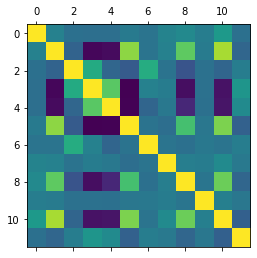

In [ ]:
plt.matshow(df.corr())

Conclusión: podemos evidenciar que si una arteria se encuentra cerca a la vivienda su precio de venta disminuye en un 10.64% , es decir que el precio se ve afectado cuando cerca de la vivienda existe una calle arteria.

## Modelamiento

In [ ]:
# realice una selección de variables para el modelo (precio es el objetivo, arteria debe estar incluida y otras cinco variables que considere relevantes)
# verifique que entre las variables seleccionadas no incluya dos o más que entreguen el mismo tipo de información
# por ejemplo, overallqual y overallcond pueden estar diciendo lo mismo de manera diferente

In [ ]:
# identifique a través de una regresión el efecto de una arteria sobre el precio, no olvide las variables de control

In [ ]:
y = df['SalePrice']
X = df[['Artery','LotArea','YearBuilt','OverallQual','YearRemodAdd','BedroomAbvGr']]
X = sm.add_constant(X)
model = sm.OLS(y,X)
reg = model.fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     514.7
Date:                Sat, 22 Oct 2022   Prob (F-statistic):               0.00
Time:                        01:13:17   Log-Likelihood:                -17712.
No. Observations:                1460   AIC:                         3.544e+04
Df Residuals:                    1453   BIC:                         3.548e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -6.66e+04   9345.421     -7.126   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Interpretación del modelo

In [ ]:
# interprete el efecto y evalúe la significancia estadística de la variable arteria y para cada una de las variables de control

* Las variables *LotArea, YearBuilt, OverallQual*, *YearRemodAdd* y *BedroomAbvGr* son significativas porque el P-valor esta por debajo de 0.05 (nivel de significancia). También, porque dentro de sus intervalos de confianza, no se encuentra la hipótesis nula, es decir, el número 0
* El P-valor de la variable *Artery* se encuentra por encima del nivel de significancia de 0.05 y dentro de su intervalo de confianza contiene el 0, lo que significa que no es significativa, es decir, hay más probabilidades de que los resultados sean aleatorios
* Si una vivienda tiene una artería cerca, su precio de venta baja 1.27 unidad moneda
* Por una unidad de más en el área del inmueble, el precio de la vivienda aumenta 1.43 unidad moneda
* Por un año de construcción más (depreciación del inmueble), el precio de venta de la vivienda disminuye 238.60 unidad moneda
* A mayor calidad de la fachada, el precio de venta de la vivienda aumenta 3.80 unidad moneda
* Por un año de remodelación más, el precio de venta de la vivienda disminuye 328.67 unidad moneda
* Una habitación de más contribuye a un aumento del precio de venta de la vivienda 8824.93 unidad moneda

## Conclusiones generales

In [ ]:
# concluya sobre lo desarrollado y lo encontrado

En la variable de años de construccion hay relación negativa que puede ser explicada por la depreciación de los inmuebles. Sin embargo, hay datos atípicos que se pueden responder a casos donde la vivienda se ha valorizado por motivos de interés cultural como el patrimonio.

La disposición a pagar por una vivienda al estar cerca de una arteria disminuye su precio. Esto se debe a que la persona puede estar prefiriendo no vivir cerca de una vía principal para evitar contaminación auditiva, desgaste en el inmueble por vibración al transitar vehículos, entre otras afectaciones.

La mayoría de la población le da más importancia a algunas variables de la vivienda, como los años de construcción, la remodelación, la calidad entre otras, es decir, que estas variables tienen relevancia en la compra de esta, y no solamente en la arteria.

Este es un caso de preferencia revelada con el método de precios hedónicos.